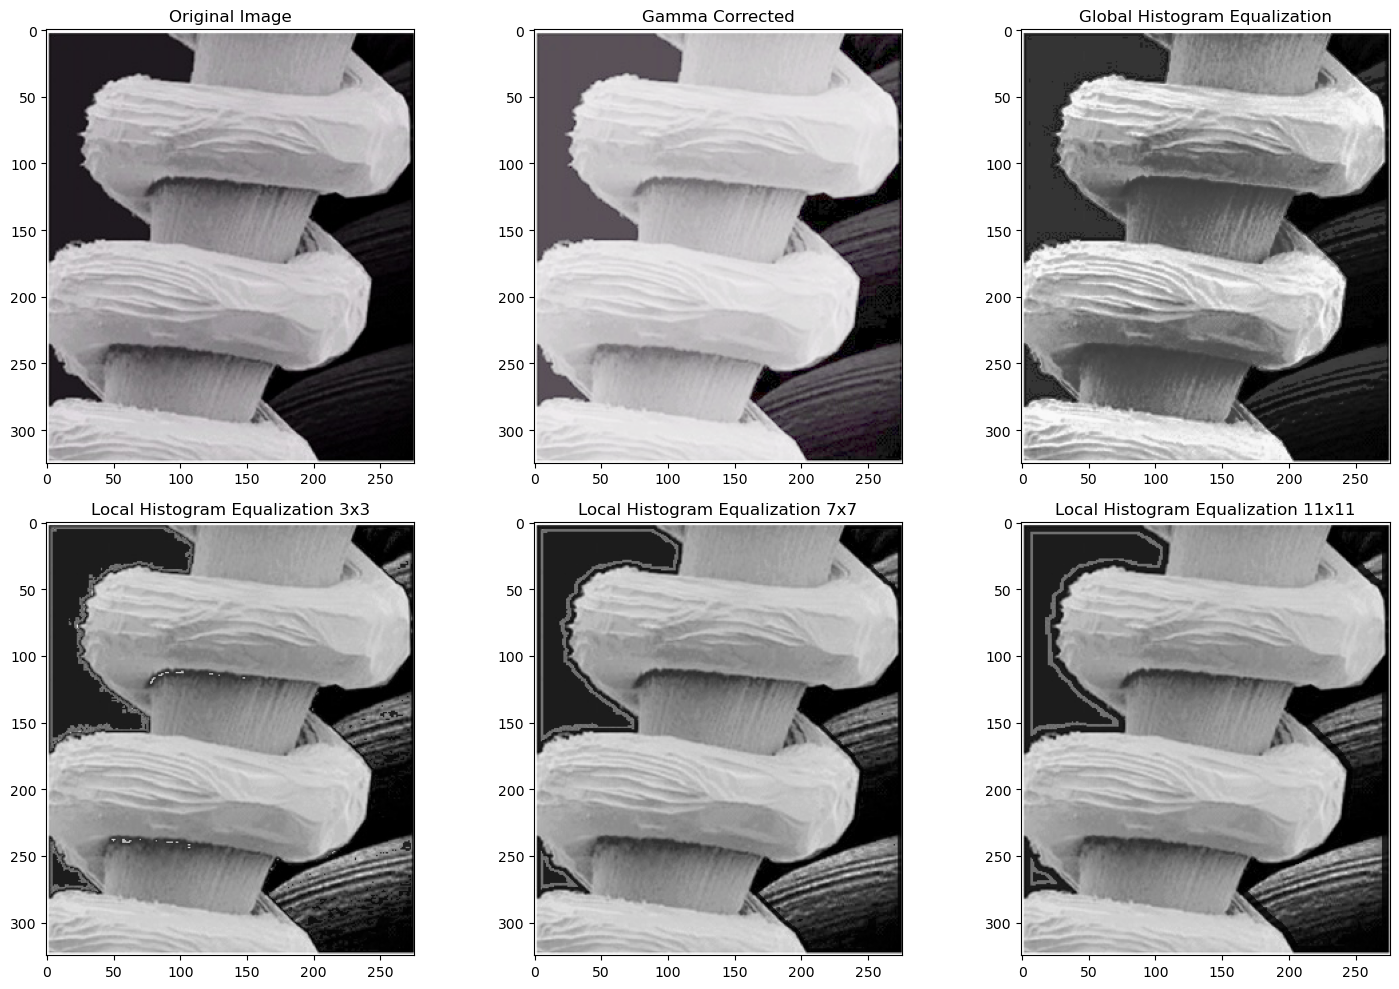

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_gamma(image, gamma=0.5):
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def global_histogram_equalization(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 1. Compute the histogram
    hist, _ = np.histogram(gray.flatten(), 256, [0,256])
    
    # 2. Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF to fit in the 0-255 range (8-bit image)
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype(np.uint8)
    
    # 3. Use the CDF to equalize the image
    # The power of this operation is that it performs the entire transformation 
    # for all pixels in the image simultaneously
    equalized_img = cdf_normalized[gray]
    
    return equalized_img

def local_histogram_enhancement(image, ksize, E=4, k1=0.4, k2=0.02, k3=0.4):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Global mean and standard deviation
    M_G = np.mean(gray)
    D_G = np.std(gray)

    # Create a padded version of the original for border processing
    padded = np.pad(gray, ksize//2, mode='reflect')

    enhanced_img = np.zeros_like(gray, dtype=np.uint8)

    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            # Extracting local neighborhood
            local_region = padded[i:i+ksize, j:j+ksize]
            
            # Local mean and standard deviation
            m_S = np.mean(local_region)
            s_S = np.std(local_region)

            # Applying the given conditions
            if m_S <= k1 * M_G and k2 * D_G <= s_S <= k3 * D_G:
                enhanced_img[i, j] = E * gray[i, j]
            else:
                enhanced_img[i, j] = gray[i, j]

    return enhanced_img


image = cv2.imread("./assignment2_image1.jpg", cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# 1. Gamma Correction
gamma_corrected = adjust_gamma(image, 0.5)

# 2. Global Histogram Equalization
global_hist_eq = global_histogram_equalization(image)

# 3. Local Histogram Equalization
local_hist_eq_3x3 = local_histogram_enhancement(image, 3)
local_hist_eq_7x7 = local_histogram_enhancement(image, 7)
local_hist_eq_11x11 = local_histogram_enhancement(image, 11)

# Displaying the enhanced images using matplotlib
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Corrected')

plt.subplot(2, 3, 3)
plt.imshow(global_hist_eq, cmap='gray')
plt.title('Global Histogram Equalization')

plt.subplot(2, 3, 4)
plt.imshow(local_hist_eq_3x3, cmap='gray')
plt.title('Local Histogram Equalization 3x3')

plt.subplot(2, 3, 5)
plt.imshow(local_hist_eq_7x7, cmap='gray')
plt.title('Local Histogram Equalization 7x7')

plt.subplot(2, 3, 6)
plt.imshow(local_hist_eq_11x11, cmap='gray')
plt.title('Local Histogram Equalization 11x11')

plt.tight_layout()
plt.show()

# Save the images to a folder
output_folder = "./OUTPUT/"  # Very sure this directory exists

cv2.imwrite(output_folder + "gamma_corrected.jpg", gamma_corrected);
cv2.imwrite(output_folder + "global_hist_eq.jpg", global_hist_eq);
cv2.imwrite(output_folder + "local_hist_eq_3x3.jpg", local_hist_eq_3x3);
cv2.imwrite(output_folder + "local_hist_eq_7x7.jpg", local_hist_eq_7x7);
cv2.imwrite(output_folder + "local_hist_eq_11x11.jpg", local_hist_eq_11x11);


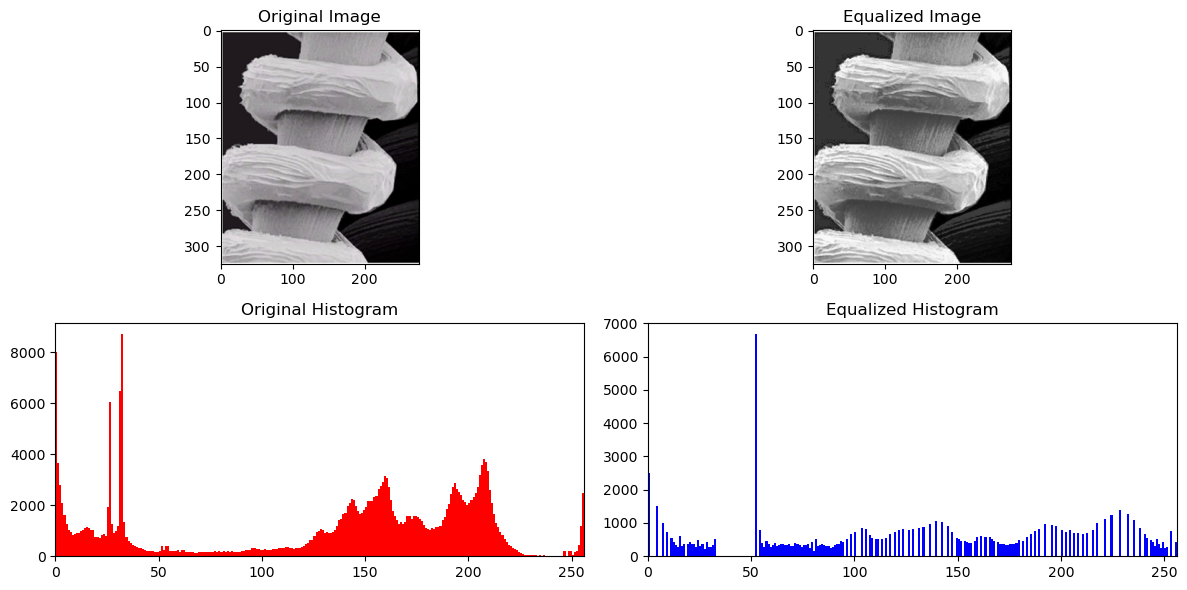

In [16]:
# Plot original and equalized histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(global_hist_eq, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 3)
plt.hist(image.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.hist(global_hist_eq.flatten(), 256, [0,256], color='b')
plt.xlim([0,256])
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()

\begin{equation}
g(x,y) = 
\begin{cases} 
E \times f(x,y) & \text{if } m_S \leq k_1 M_G \text{ and } k_2 D_G \leq s_S \leq k_3 D_G \\
f(x,y) & \text{otherwise}
\end{cases}
\end{equation}

Where:

$E, k_1, k_2, k_3 $ are specified constants

$ M_G $ is the global mean of the image

$ D_G $ is the global standard deviation

$ m_S $ is the local mean

$ s_S $ is the local standard deviation.